## Confusion matrix in scikit-learn

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
cancer = datasets.load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
label = pd.DataFrame(cancer.target, columns=['cancer'])
label.head()

,cancer
0,0
1,0
2,0
3,0
4,0


In [8]:
df = pd.concat([features, label], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
x = df[df.drop('cancer', axis=1).columns.values]
y = df['cancer']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred[:5]

array([1, 0, 0, 1, 1])

In [11]:
confusion_matrix(y_test, y_pred)

array([[ 77,   3],
       [  4, 144]], dtype=int64)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        80
           1       0.98      0.97      0.98       148

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



## Logistic regression in scikit-learn

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred[:5]

array([1, 0, 0, 1, 1])

## Plotting the ROC curve

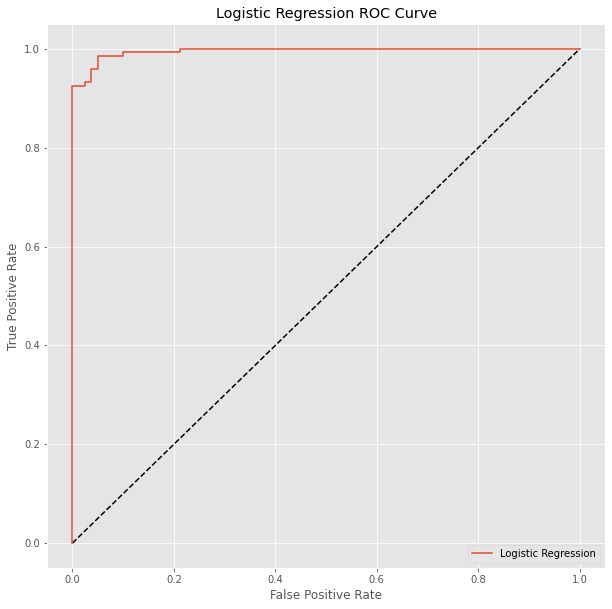

In [14]:
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(x_test)[:, 1]  # we choose the second column, the one with index 1, 
                                                 # that is, the probabilities of the predictied lables being 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

## AUC (Area Under the Roc curve)

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9953547297297297

## AUC using cross-validation

In [16]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x, y, cv=5, scoring='roc_auc')
cv_scores

array([0.99312152, 0.9852604 , 0.99669312, 0.98247354, 0.99564051])

## GridSearchCV in scikit-learn

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
model = KNeighborsClassifier()
model_cv = GridSearchCV(model, param_grid, cv=5)
model_cv.fit(x, y)
model_cv.best_params_

{'n_neighbors': 13}

In [18]:
model_cv.best_score_

0.9332401800962584

## GridSearchCV in scikit-learn (model: LogisticRegression)

In [19]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
model = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
model_cv = GridSearchCV(model, param_grid, cv=5)

# Fit it to the data
model_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(model_cv.best_params_)) 
print("Best score is {}".format(model_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.9437975469647568


## Hyperparameter tuning with RandomizedSearchCV

In [20]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
model = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
model_cv = RandomizedSearchCV(model, param_dist, cv=5)

# Fit it to the data
model_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(model_cv.best_params_))
print("Best score is {}".format(model_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4}
Best score is 0.9349169383636081


## Hold-out set in practice I: Classification

In [21]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: model
model = LogisticRegression()

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: model_cv
model_cv = GridSearchCV(model, param_grid, cv=5)

# Fit it to the training data
model_cv.fit(x_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(model_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(model_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9384484228473999


In [22]:
y_pred = model_cv.predict(x_test)
y_pred[:5]

array([1, 0, 0, 1, 1])

In [23]:
confusion_matrix(y_test, y_pred)

array([[ 76,   4],
       [  3, 145]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        80
           1       0.97      0.98      0.98       148

    accuracy                           0.97       228
   macro avg       0.97      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228



## Hold-out set in practice II: Regression

In [25]:
diabetes = datasets.load_diabetes()

In [26]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [27]:
x = diabetes.data
y = diabetes.target

In [28]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}  # Elastic net regularization
                                     # In elastic net regularization, the penalty term is a linear combination of the l1 and l2 penalties. 
                                     # In scikit-learn, this term is represented by the 'l1_ratio' parameter: 
                                     # An 'l1_ratio' of 1 corresponds to an l1 penalty, and anything lower is a combination of l1 and l2.

# Instantiate the ElasticNet regressor
model = ElasticNet()

# Setup the GridSearchCV object: model_cv
model_cv = GridSearchCV(model, param_grid, cv=5)

# Fit it to the training data
model_cv.fit(x_train, y_train)

# Predict on the test set and compute metrics
y_pred = model_cv.predict(x_test)
r2 = model_cv.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(model_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.3421656776375358
Tuned ElasticNet MSE: 3848.4618529416193
